In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
def lerp(x0, y0, x1, y1, x):
    if x1 == x0:
        raise ValueError("x0 and x1 cannot be the same value")
    return y0 + (x - x0) * (y1 - y0) / (x1 - x0)

def linearInterpT(R):
    R1 = 6.7559
    R2 = 6.3308    
    R3 = 4.6151
    R4 = 4.3397
    R5 = 3.0333
    R6 = 2.8625
    R7 = 2.2810
    R8 = 2.1576


    T1 = 94
    T2 = 96
    T3 = 106
    T4 = 108
    T5 = 120
    T6 = 122
    T7 = 130
    T8 = 132

    if R2 <= R <= R1:  # between R1 and R2
        return lerp(R1, T1, R2, T2, R)
    elif R4 <= R <= R3:  # between R3 and R4
        return lerp(R3, T3, R4, T4, R)
    elif R6 <= R <= R5:  # between R5 and R6
        return lerp(R5, T5, R6, T6, R)
    elif R8 <= R <= R7:  # between R7 and R8
        return lerp(R7, T7, R8, T8, R)
    else:
        raise ValueError(f"R={R} is out of interpolation range")

vecLinInterpT = np.vectorize(linearInterpT)  


In [65]:
path = "lab-results/leslies-box.txt"
data =  np.loadtxt(path, skiprows=1)
with open(path, "r") as f:
    header = f.readline().strip()
print(header)
print(data)

PS = data[:,0] 
R = data[:,1]
T = vecLinInterpT(R) + 273.15
Blank = data[:,3]
White = data[:,4]
Gray = data[:,5]
Black = data[:,6]

PS R dR VS_ ... Blank White Gray Black
[[ 5.   6.7  0.1  0.9 10.6  3.2 10.9]
 [ 7.   4.5  0.1  0.7 12.8  3.8 13.1]
 [ 8.   2.9  0.1  0.9 16.5  4.9 17.3]
 [ 9.   2.2  0.1  1.  19.1  5.7 19.5]]


In [66]:
T-273.15

array([ 94.26299694, 106.83587509, 121.56088993, 131.31280389])

In [67]:
alphas = Black/T**4

In [68]:
alphas*10**10

array([5.98147701, 6.28349802, 7.12737597, 7.28652163])

In [69]:
epsilon_blank = Blank/(T**4*alphas)
epsilon_white = White/(T**4*alphas)
epsilon_gray = Gray/(T**4*alphas)

In [70]:
epsilons = [epsilon_blank, epsilon_white, epsilon_gray, np.array([1,1,1,1])]
names = ['Blank', 'Hvit', 'Grå', 'Svart']

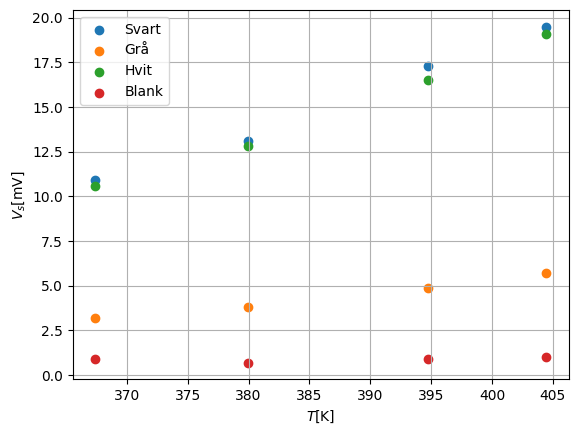

In [ ]:
#sns.scatterplot(x=R, y=Blank)
names2 = ['Blank', 'Hvit', 'Grå']+['Svart']
for i in reversed(range(3,7)):
    plt.scatter(T,data[:,i], label=names[i-3])
plt.legend()
plt.ylabel(r"$V_s[\text{mV}]$")
plt.xlabel(r"$T[\text{K}]$")
plt.title()
plt.grid()
plt.show()


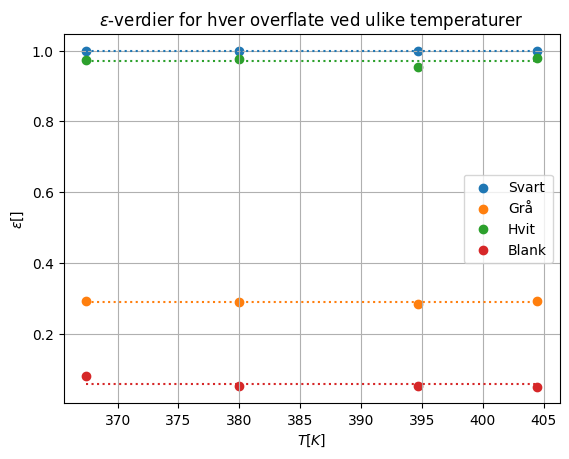

In [77]:
for i in reversed(range(len(epsilons))):
    plt.scatter(T, epsilons[i], label=names[i])
    plt.plot([T.min(),T.max()],[epsilons[i].mean()]*2, ls='dotted')

plt.title(r"$\epsilon$-verdier for hver overflate ved ulike temperaturer")
plt.ylabel(r"$\epsilon []$")
plt.xlabel(r"$T [K]$")
plt.legend()
plt.grid()
plt.show()

In [73]:
Eblank = epsilon_blank.mean()
print(Eblank)

Ewhite = epsilon_white.mean()
print(Ewhite)

Egray = epsilon_gray.mean()
print(Egray)

0.05982727362815021
0.9707051764455276
0.28979975101414607


vs prop med j = epsilon sigma t^4

svart verflate
vs prop t^4
altsp
vs/t^4 prop 1
vs/t^4 = alpha
dette blir vår proposjonalitetskonstant^

for de andre sidene:
vs/t^4 = epsilon*alpha
som gir 
epsilon = vs/(t^4 * alpha)


In [74]:
delta_s = 0.1
def sigma(vs):
    simga_epsilon2_Verdier = delta_s**2 / Black**2 *(1+(vs/Black)**2)
    sigma_epsilon2 = simga_epsilon2_Verdier.mean()
    sigma_epsilon = np.sqrt(sigma_epsilon2)
    return(sigma_epsilon)

In [75]:
print(sigma(Blank))
print(sigma(White))
print(sigma(Gray))

0.007124786939851203
0.00991220008282635
0.007403302521973245
